# Feature Engineering
* 특징 공학이란 머신러닝의 특징 행렬을 구축하는 데 사용할 수 있는 수치형 데이터로 변환하는 것
* 범주형 특징을 수치형 특징으로 변환 == encoding
* 복잡도를 증가시키기 위한 유도 특징
* 누락 데이터 대체

## 범주 특징의 변환

In [7]:
import numpy  as np
from sklearn.feature_extraction import DictVectorizer

data = [
    {"price" : 120000000, "rooms" : 3, "location" : "잠실동"},
    {"price" : 70000000, "rooms" : 4, "location" : "천호동"},
    {"price" : 130000000, "rooms" : 4, "location" : "신천동"},
    {"price" : 450000000, "rooms" : 2, "location" : "강호동"}
]

dv = DictVectorizer(sparse=False, dtype=np.int)
dv.fit_transform(data)

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_27861/97400280.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dv = DictVectorizer(sparse=False, dtype=np.int)


array([[        0,         0,         1,         0, 120000000,         3],
       [        0,         0,         0,         1,  70000000,         4],
       [        0,         1,         0,         0, 130000000,         4],
       [        1,         0,         0,         0, 450000000,         2]])

In [8]:
dv.get_feature_names_out()

array(['location=강호동', 'location=신천동', 'location=잠실동', 'location=천호동',
       'price', 'rooms'], dtype=object)

In [9]:
# sparse : 희소행렬 -> 0이 대부분. 1은 극소수인 행렬 존재 -> 이런 경우 1의 위치 정보 값을 가지는 data를 저장 -> 희소 행렬이라고 한다 -> 메모리를 적게 사용 가능
dv = DictVectorizer(sparse=True, dtype=np.int) 
dv.fit_transform(data)

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_27861/2747969576.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dv = DictVectorizer(sparse=True, dtype=np.int)


<4x6 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

## 텍스트 특징의 변환

In [16]:
from sklearn.feature_extraction.text import CountVectorizer # text data를 특징 행렬로 변환

text = [
    "mobile phone", 
    "battlegrounds mobile game",
    "phone game"
]

cv = CountVectorizer()
X = cv.fit_transform(text)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [21]:
import pandas as pd

pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

# CountVectorizer : data가 3개 였는데, 총 4개의 column의 생성 
# --> 몇 개의 단어가 쓰였는지 수치화됨(count) == 단어의 빈도수

,battlegrounds,game,mobile,phone
0,0.000000,0.000000,0.707107,0.707107
1,0.680919,0.517856,0.517856,0.000000
2,0.000000,0.707107,0.000000,0.707107


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tv = TfidfVectorizer()
X = tv.fit_transform(text)
X

pd.DataFrame(X.toarray(), columns=tv.get_feature_names_out())

# TfidfVectorizer : 단어의 빈도수 뿐만 아니라 중요도와 관련된 가중치를 적용한 값을 적용


,battlegrounds,game,mobile,phone
0,0.000000,0.000000,0.707107,0.707107
1,0.680919,0.517856,0.517856,0.000000
2,0.000000,0.707107,0.000000,0.707107


## 유도 특징의 추가

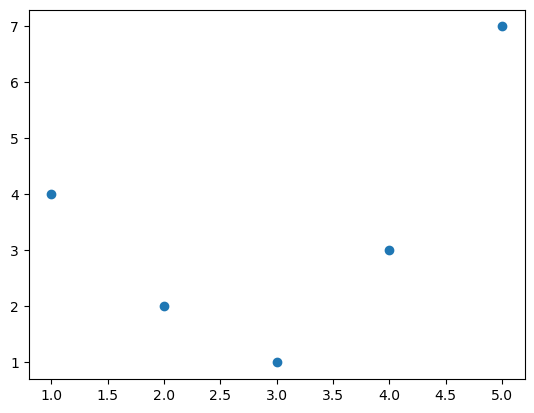

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 6)
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

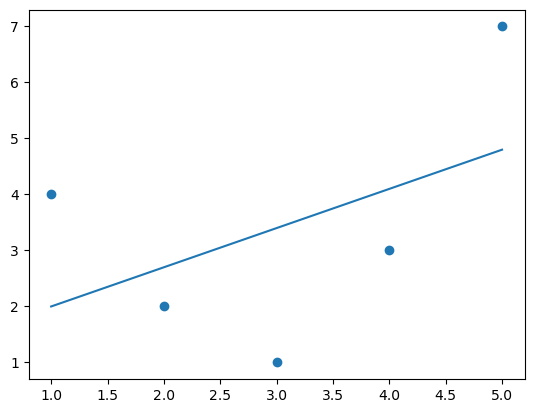

In [25]:
from sklearn.linear_model import LinearRegression

X = x.reshape(-1, 1) # X를 5*1 shape 형태로 변환
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.scatter(x, y)
plt.plot(x, y_pred);

# underfitting, 고편향된 모델임으로 복잡도를 높여줘야 한다.

In [26]:
# model의 복잡도를 높여주는 방법
from sklearn.preprocessing import PolynomialFeatures

#  5*1 shape 형태였던 X를 5*3 shape으로 고차원 변환
poly = PolynomialFeatures(degree=3, include_bias=False) 
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


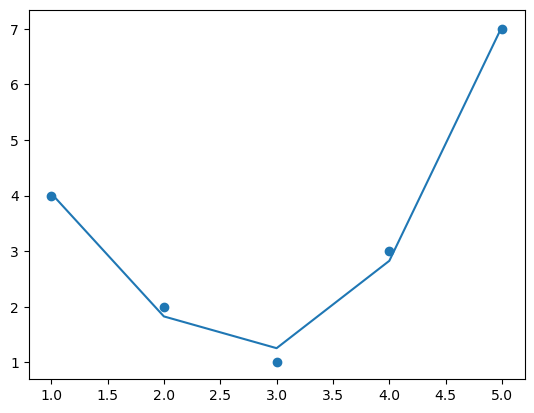

In [28]:
model = LinearRegression()
model.fit(X2, y)
y_pred = model.predict(X2)

plt.scatter(x, y)
plt.plot(x, y_pred);

## 누락 데이터 대체

In [29]:
X = np.array([
    [np.nan, 0, 3],
    [3, 7, 9],
    [3, 5, 2],
    [4, np.nan, 6],
    [8, 8, 1]
])

y = np.array([14, 16, -1, 8, -5])

In [33]:
from sklearn.impute import SimpleImputer # 누락값 대체

imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2


array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

## 특징 파이프라인
간단히 말해, 묶어주는 것

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer # 누락값 대체

# 1. 누락 값을 평균으로 대체
# 2. 이차 형태의 유도특징 변환 (유도 특징을 추가해 모델의 복잡도를 높임)
# 3. 선형회귀 적합
model = make_pipeline(
    SimpleImputer(strategy='mean'),
    PolynomialFeatures(degree=2),
    LinearRegression()
)

model.fit(X, y)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [35]:
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
